<a href="https://colab.research.google.com/github/Aditya12D/deeplearning/blob/main/churnpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rjmanoj_credit_card_customer_churn_prediction_path = kagglehub.dataset_download('rjmanoj/credit-card-customer-churn-prediction')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


since we are working on creating an ANN for customer churn prediction so there is no need to pass Rownumber, CustomerId, Surname

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [ ]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There is also need to encode the categorical values so columns geography, gender

In [ ]:
encoded= pd.get_dummies(df, columns=["Geography","Gender"],drop_first=True)

In [ ]:
encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
y=encoded["Exited"]
X=encoded.drop(columns=["Exited"])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.transform(X_test)

In [ ]:
print(X_trainscaled)

[[-1.2602125  -0.74816269  1.38093659 ... -0.57696537 -0.57484841
   0.91809223]
 [ 0.30513526  0.01280567 -0.00224767 ... -0.57696537  1.73958906
   0.91809223]
 [-0.81445122 -0.5579206  -1.38543194 ... -0.57696537 -0.57484841
  -1.08921519]
 ...
 [ 0.68869729 -0.74816269  1.03514052 ... -0.57696537 -0.57484841
   0.91809223]
 [-0.01622752 -0.74816269  0.68934446 ...  1.73320628 -0.57484841
   0.91809223]
 [ 0.09780443  0.01280567 -1.38543194 ...  1.73320628 -0.57484841
  -1.08921519]]


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential(
    [
        keras.Input(shape=(11,)),
        Dense(3,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

saved=model.fit(X_trainscaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8816 - val_loss: 0.6351
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6196 - val_loss: 0.5273
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5226 - val_loss: 0.4917
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4870 - val_loss: 0.4751
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4779 - val_loss: 0.4636
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4606 - val_loss: 0.4544
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4530 - val_loss: 0.4459
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4454 - val_loss: 0.4379
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4442 - val_loss: 0.4297
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4344 - val_loss: 0.4221
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4079 - val_loss: 0.4139
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.layers[0].get_weights()

[array([[-4.46071252e-02,  5.61458133e-02,  2.77085695e-02],
        [-5.44534214e-02, -1.21019471e+00, -1.13326833e-01],
        [-1.07823242e-03, -1.11523718e-02, -4.50754762e-02],
        [ 2.21298829e-01, -2.56795138e-01, -4.24154431e-01],
        [ 1.53472388e+00,  2.91845202e-01, -1.63076150e+00],
        [-9.51173156e-02, -9.73726809e-02, -8.73332918e-02],
        [-5.97414851e-01, -5.60596883e-01, -7.06246257e-01],
        [ 4.81281802e-02,  3.12920101e-03,  2.81785820e-02],
        [ 3.46912891e-02,  7.62996897e-02,  3.67975533e-01],
        [ 3.56200933e-02, -5.04875965e-02, -4.51081879e-02],
        [-1.74311161e-01,  1.20766506e-01, -7.79616162e-02]], dtype=float32),
 array([-0.623575  ,  1.7301905 ,  0.00176714], dtype=float32)]

In [ ]:
ans=model.predict(X_testscaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred=np.where(ans>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.864

In [ ]:
saved.history

{'loss': [0.7913938164710999,
  0.5817385315895081,
  0.5138241052627563,
  0.48753905296325684,
  0.47293463349342346,
  0.46210697293281555,
  0.45303380489349365,
  0.44442588090896606,
  0.4364345967769623,
  0.4287540316581726,
  0.42063891887664795,
  0.4125303030014038,
  0.4052274227142334,
  0.3987728953361511,
  0.3933217227458954,
  0.38877037167549133,
  0.38481464982032776,
  0.381369411945343,
  0.3784652650356293,
  0.3759179711341858,
  0.3737209737300873,
  0.3719019591808319,
  0.37047135829925537,
  0.3692884147167206,
  0.36841732263565063,
  0.36736512184143066,
  0.3668362498283386,
  0.3661751449108124,
  0.3657045364379883,
  0.3651995360851288,
  0.36475586891174316,
  0.36430132389068604,
  0.36393749713897705,
  0.3634142279624939,
  0.36293384432792664,
  0.3624899983406067,
  0.3618406653404236,
  0.36127743124961853,
  0.360424280166626,
  0.3597470223903656,
  0.35904160141944885,
  0.35847008228302,
  0.35777023434638977,
  0.3572152256965637,
  0.356825

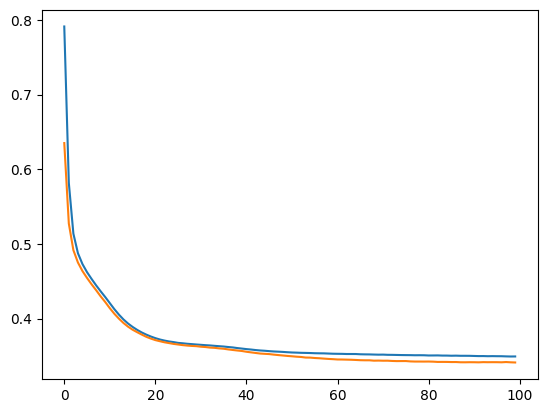

In [ ]:
import matplotlib.pyplot as plt
plt.plot(saved.history['loss'])
plt.plot(saved.history['val_loss'])